# ColabLinearRegresionTensorFlow (DUE 12. November)
In this Colab you will implement linear regression with Tensorflow-Keras [tf.keras](https://www.tensorflow.org/guide/keras), a high level library for machine learning

In [2]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")


from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
print(np.shape(X_train), np.shape(X_test))

(404, 13) (102, 13)


In [5]:
#perform data normalization
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
X_train = (X_train - mu)/sigma
mu = np.mean(X_test,axis=0)
sigma = np.std(X_test,axis=0)
X_test = (X_test - mu)/sigma




### To perform the linear regression task, use the sequential Model of Keras. Check out:
[tf.keras.Sequential](https://www.tensorflow.org/guide/keras/sequential_model?hl=de).

Fill into your model an input with shape (13,1), the bias term `=[column of ones]` is added automatically, you don't need to do it here. 

Finally add a dense layer [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?hl=de) with output of 1. The output is a scalar, the price of a house, therefore it has a dimension of 1. **(10 Pts)**

In [6]:
house_model = tf.keras.Sequential()
house_model.add(tf.keras.layers.Input(shape=(13,)))
house_model.add(tf.keras.layers.Dense(1))
print(house_model)

### Use the method [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) for your model that you created with tf.keras.Sequential. Use the [stochastic gradient descent optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) with learning rate = 0.0001 and as a loss the mean squared error. **(10 Pts)**


In [7]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
house_model.compile(optimizer=opt, loss='mean_squared_error')
              

### Use the method [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) to train the model. Pass X_train, y_train, a batch_size of 1 and train for 1000 epochs. **(10 Pts)**

In [ ]:
house_model.fit(X_train, y_train, epochs=1000, batch_size=1)

Epoch 1/1000
404/404 [==============================] - 1s 3ms/step - loss: 22.1244
Epoch 2/1000
404/404 [==============================] - 1s 3ms/step - loss: 22.1223
Epoch 3/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1206
Epoch 4/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1201
Epoch 5/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1225
Epoch 6/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1230
Epoch 7/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1227
Epoch 8/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1206
Epoch 9/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1216
Epoch 10/1000
404/404 [==============================] - 1s 2ms/step - loss: 22.1213
Epoch 11/1000
404/404 [==============================] - 1s 3ms/step - loss: 22.1216
Epoch 12/1000
404/404 [==============================] - 1s 3ms/step - los

Estimate the parameters with the normal equation as you did in the LinearRegression.ipynb to have the optimal ones.

In [9]:
opt = (np.linalg.inv((np.transpose(X_train)@X_train)))@np.transpose(X_train)@y_train
print(opt)

[-1.10749194  1.35308963  0.02710126  0.9943535  -2.40156557  2.3962877
  0.2111952  -3.47121628  2.90814885 -1.95741889 -1.98298545  0.81955092
 -4.02739073]


### Use the method summary and display the trainable_weights to compare with the optimum.

In [12]:
house_model.summary()
house_model.trainable_weights
#the result that you should get is displayed below

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-1.0716914 ],
        [ 1.2781307 ],
        [-0.1376257 ],
        [ 1.0177503 ],
        [-2.3469198 ],
        [ 2.4361129 ],
        [ 0.15100761],
        [-3.4505672 ],
        [ 2.3685455 ],
        [-1.3808432 ],
        [-1.9469712 ],
        [ 0.82027566],
        [-4.0145483 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([22.394707], dtype=float32)>]

### Use the [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method of your model to predict the prices for your test dataset.**(10 Pts)**

In [15]:
y_hat = house_model.predict(X_test)


4/4 [==============================] - 0s 2ms/step


In [16]:
print(np.shape(y_hat), y_hat)
#result is displayed below

(102, 1) [[ 5.5160217]
 [20.244171 ]
 [20.4272   ]
 [32.858006 ]
 [25.64199  ]
 [19.715885 ]
 [29.502794 ]
 [25.365793 ]
 [18.135437 ]
 [21.546396 ]
 [19.153414 ]
 [17.25511  ]
 [14.967941 ]
 [35.33361  ]
 [16.784143 ]
 [20.190092 ]
 [24.918444 ]
 [22.00926  ]
 [18.578548 ]
 [21.49351  ]
 [ 8.857831 ]
 [14.123999 ]
 [21.72311  ]
 [13.104643 ]
 [23.052986 ]
 [22.808666 ]
 [32.241035 ]
 [26.512627 ]
 [10.198233 ]
 [21.472971 ]
 [23.04017  ]
 [16.417624 ]
 [35.88983  ]
 [23.706156 ]
 [16.810827 ]
 [ 1.4245987]
 [11.995652 ]
 [21.826963 ]
 [15.929887 ]
 [28.691723 ]
 [23.437439 ]
 [28.632908 ]
 [15.436944 ]
 [34.90642  ]
 [30.743671 ]
 [23.885094 ]
 [30.585115 ]
 [17.31551  ]
 [21.193617 ]
 [23.802334 ]
 [32.258102 ]
 [18.669748 ]
 [ 7.2391415]
 [12.565723 ]
 [35.587097 ]
 [27.610298 ]
 [15.146317 ]
 [40.160034 ]
 [37.230476 ]
 [24.64276  ]
 [24.501896 ]
 [18.368505 ]
 [17.234922 ]
 [20.545065 ]
 [24.512697 ]
 [25.553635 ]
 [15.076136 ]
 [27.777662 ]
 [ 2.5071278]
 [ 7.775366 ]
 [21.97581 

Plot the estimated prices by your model vs real prices.

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

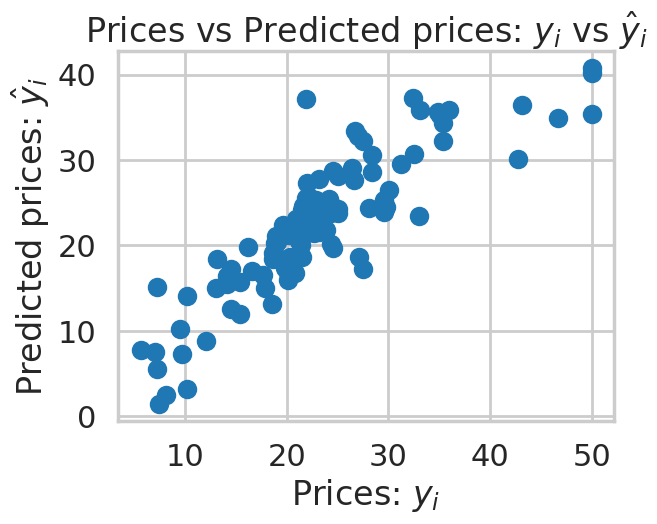

In [17]:
plt.scatter(y_test, y_hat)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
#result that you should get is displayed below